In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams

In [4]:
sns.set_style("darkgrid")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [25]:
df = pd.read_csv("store_sharing.csv")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [10]:
df.duplicated().value_counts()

False    17414
dtype: int64

In [11]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

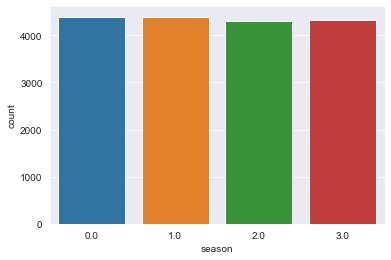

In [12]:
sns.countplot("season", data=df);

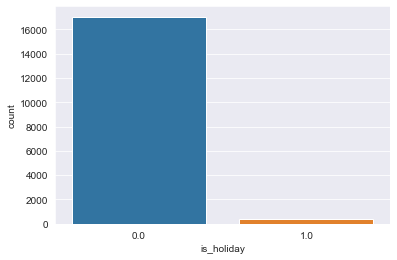

In [13]:
sns.countplot("is_holiday", data=df);

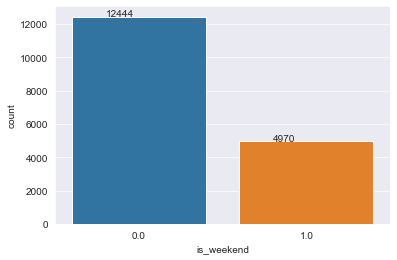

In [14]:
ax = sns.countplot("is_weekend", data=df);
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20));

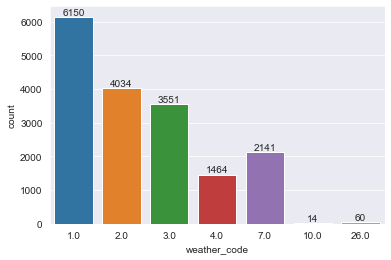

In [17]:
sns.countplot(data = df, x = "weather_code");
for index, value in enumerate(df.weather_code.value_counts().sort_index()):
    plt.text(index, value, str(value), ha="center", va="bottom")

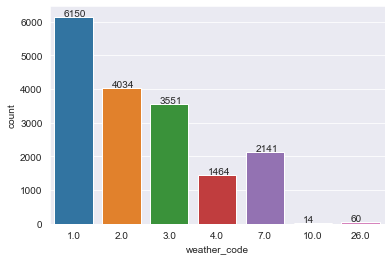

In [16]:
ax = sns.countplot("weather_code", data=df);
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.2, p.get_height()+20));

In [18]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [22]:
df.timestamp = pd.to_datetime(df.timestamp)
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [26]:
df.timestamp = pd.to_datetime(df.timestamp)
df.set_index("timestamp", inplace = True)
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [29]:
df["year_month"] = df.index.strftime("%Y-%m")
df["year"] = df.index.strftime("%Y").astype("int64")  # df["year"] = df.index.year
df["month"] = df.index.strftime("%m").astype("int64")  # df["month"] = df.index.month
df["day_of_month"] = df.index.strftime("%d").astype("int64") # df["day_of_month"] = df.index.day
df["day_of_week"] = df.index.weekday.astype("int64")
df["hour"] = df.index.strftime("%H").astype("int64")  # df["hour"] = df.index.hour

In [30]:
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,year_month,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,2015-01,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,2015-01,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,2015-01,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,2015-01,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,2015-01,1,4,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,2017-01,1,3,1,19
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,2017-01,1,3,1,20
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,2017-01,1,3,1,21


<AxesSubplot:>

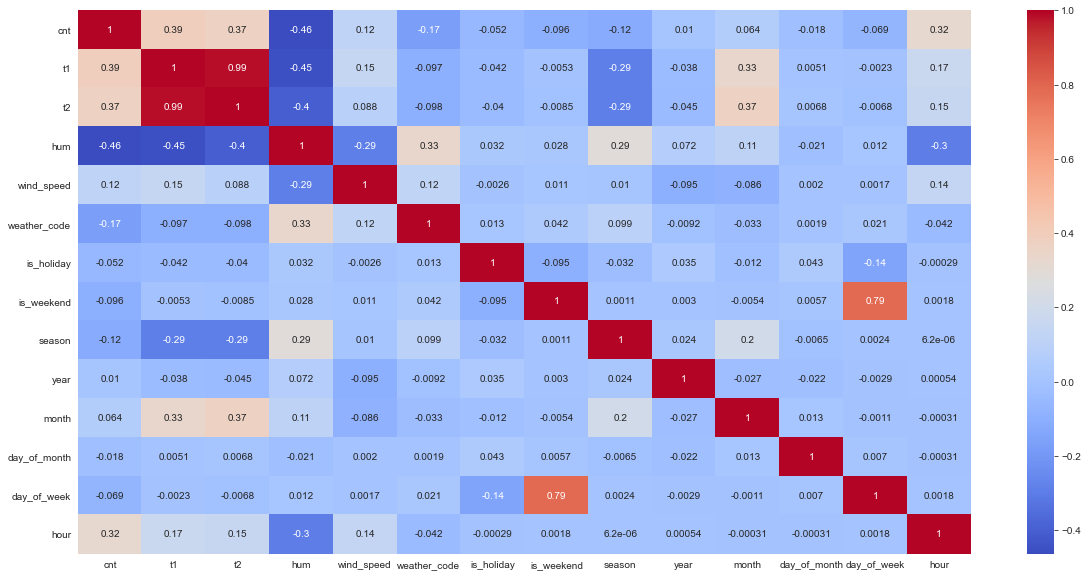

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

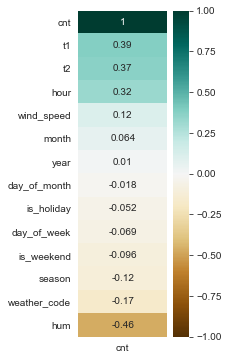

In [36]:
plt.figure(figsize=(2,6))
sns.heatmap(df.corr()[["cnt"]].sort_values(by="cnt", ascending=False), annot=True, cmap="BrBG", vmin=-1);

In [37]:
df.corr()[["cnt"]].sort_values(by="cnt", ascending=False)

,cnt
cnt,1.000000
t1,0.388798
t2,0.369035
hour,0.324423
wind_speed,0.116295
month,0.063757
year,0.010046
day_of_month,-0.017887
is_holiday,-0.051698
day_of_week,-0.068688


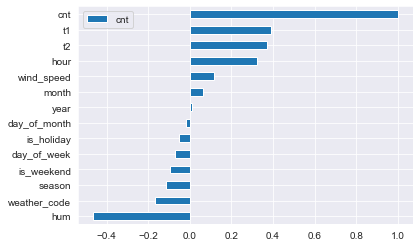

In [43]:
df.corr()[["cnt"]].sort_values(by="cnt", ascending=True).plot.barh();

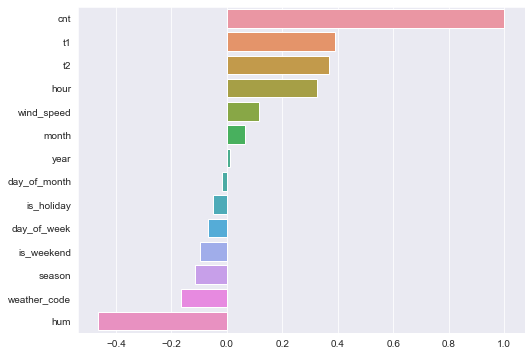

In [41]:
#with seaborn
plt.figure(figsize=(8,6))
sns.barplot(x = df.corr().cnt.sort_values(ascending=False).values, y=df.corr().cnt.sort_values(ascending=False).index);

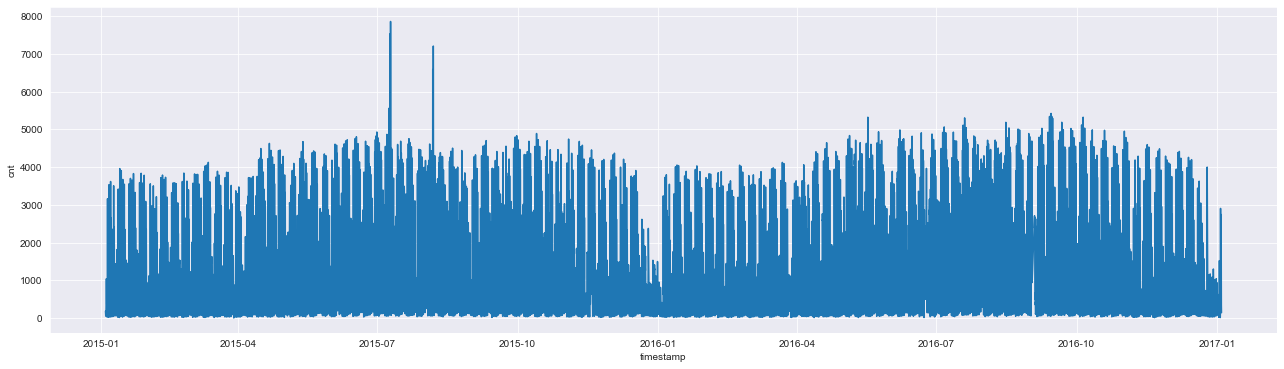

In [47]:
plt.figure(figsize=(22,6))
sns.lineplot(x=df.index, y="cnt", data=df);

In [51]:
df_sum = pd.DataFrame(df.groupby("year_month").cnt.sum())

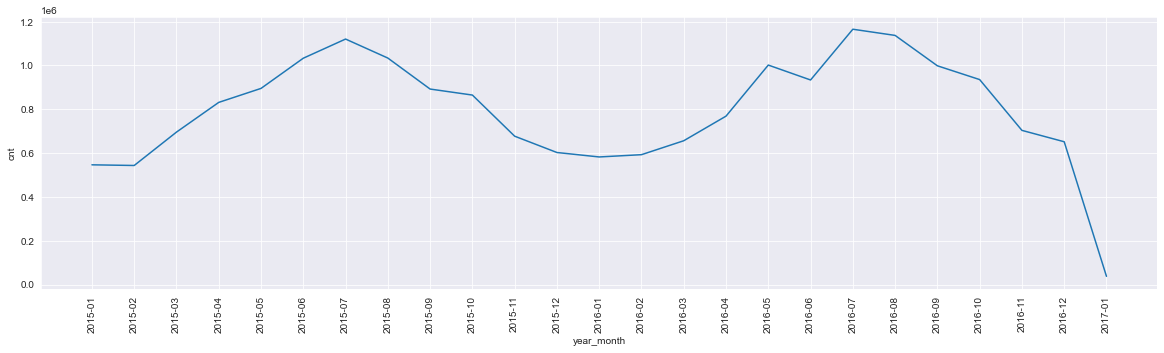

In [52]:
plt.figure(figsize=(20,5))
sns.lineplot(x="year_month",y="cnt", data = df_sum)
plt.xticks(rotation=90);

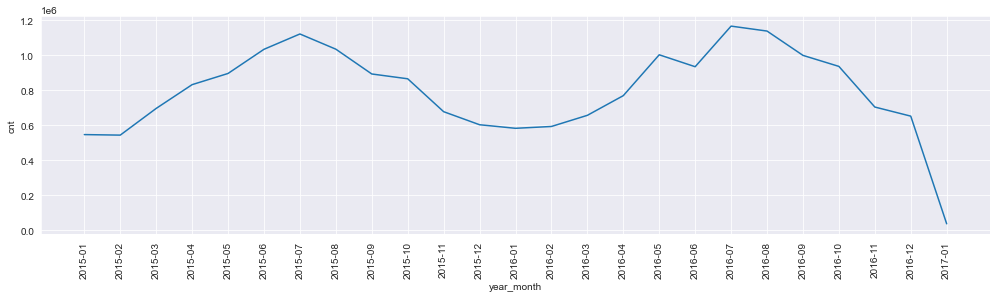

In [53]:
plt.figure(figsize=(17,4))
sns.lineplot(data = df, x = "year_month", y = "cnt", ci = None, estimator = sum)
plt.xticks(rotation = 90)
plt.show()

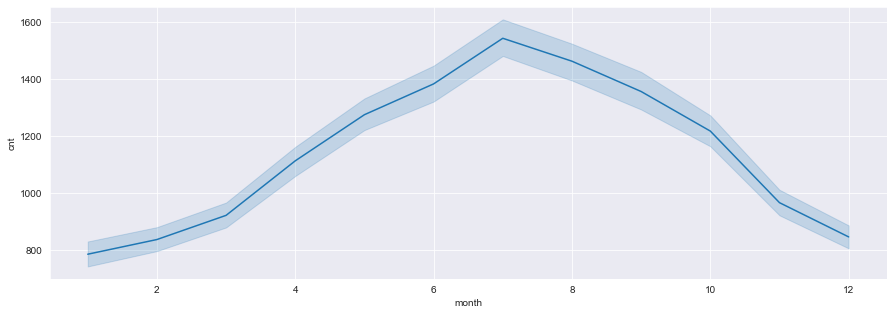

In [57]:
plt.figure(figsize=(15,5))
sns.lineplot(x="month", y="cnt", data=df);

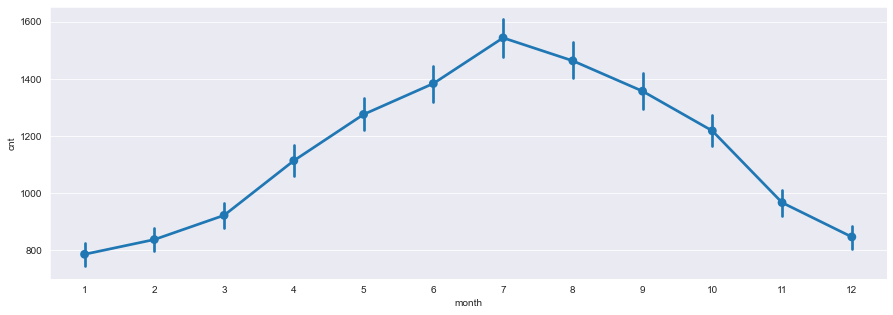

In [59]:
plt.figure(figsize=(15,5))
sns.pointplot(x="month", y="cnt", data=df, ci=95);

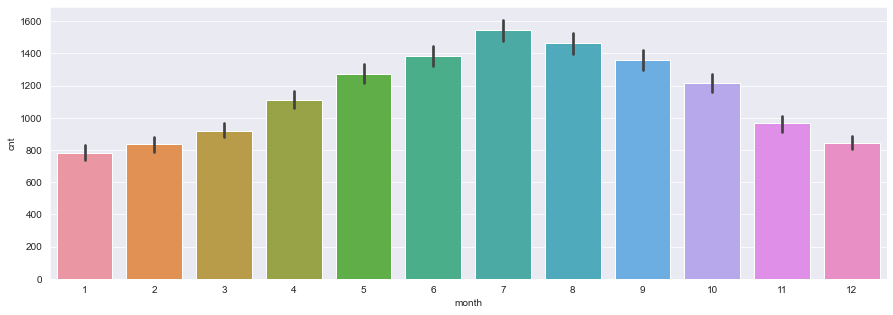

In [60]:
plt.figure(figsize=(15,5))
sns.barplot(x="month", y="cnt", data=df, ci=95);

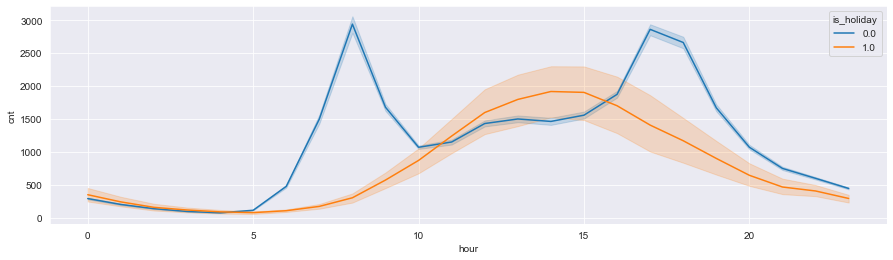

In [62]:
plt.figure(figsize=(15,4))
sns.lineplot(x="hour", y="cnt", data=df, hue="is_holiday");

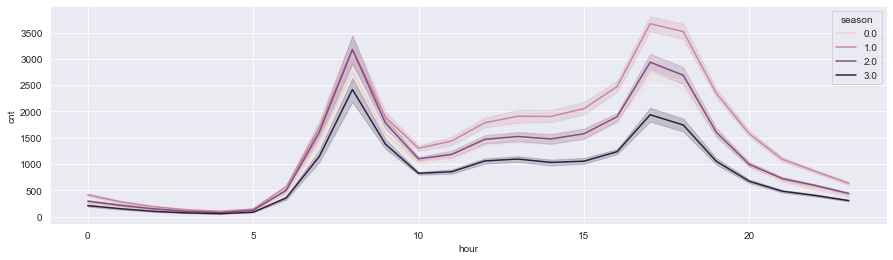

In [65]:
plt.figure(figsize=(15,4))
sns.lineplot(x="hour", y="cnt", data=df, hue="season");

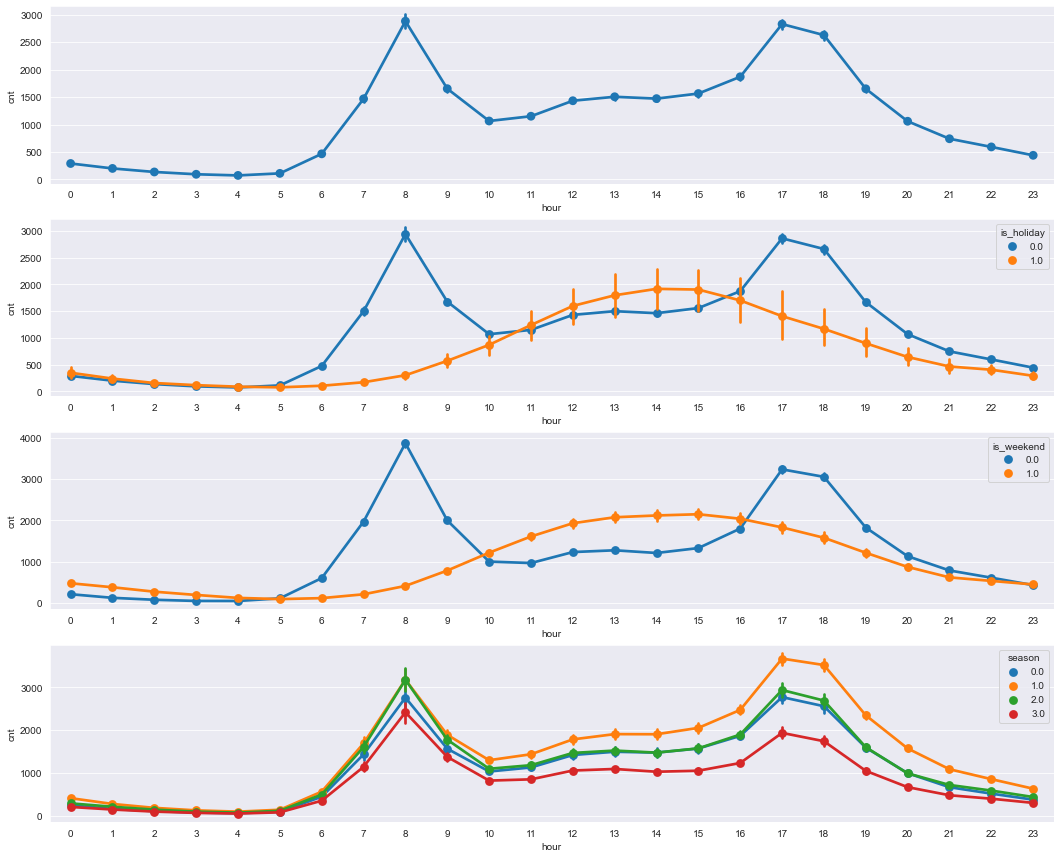

In [70]:
# with pointplot #OBJECT ORIENTED METOD
fig, ax = plt.subplots(ncols=1, nrows=4, figsize = (18,15))
sns.pointplot(data=df, x="hour", y="cnt", ax = ax[0])
sns.pointplot(data=df, x="hour", y="cnt", ax = ax[1], hue="is_holiday")
sns.pointplot(data=df, x="hour", y="cnt", ax = ax[2], hue="is_weekend")
sns.pointplot(data=df, x="hour", y="cnt", ax = ax[3], hue="season");

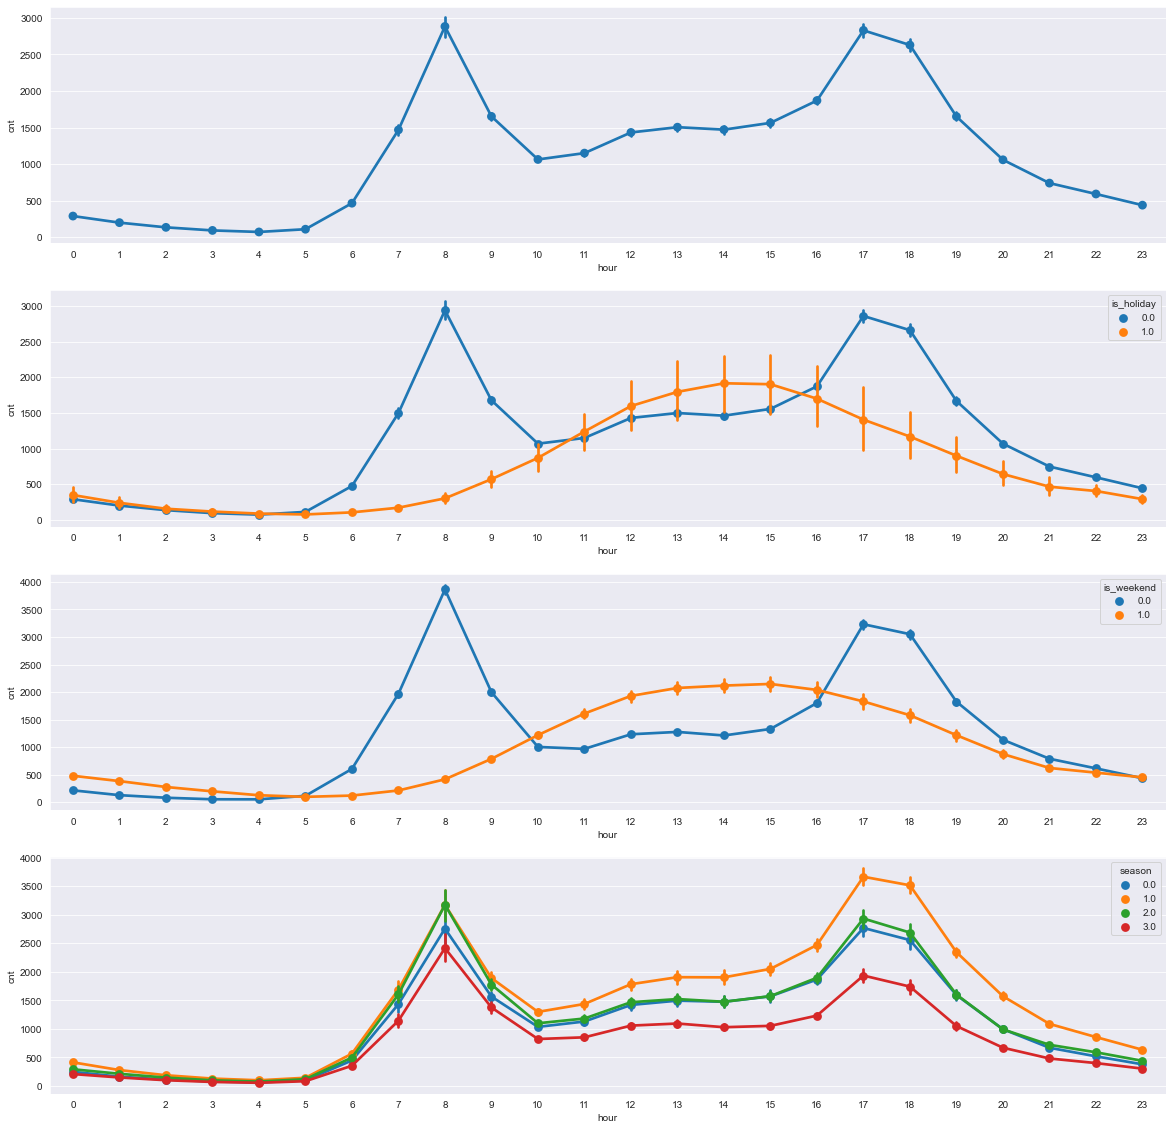

In [69]:
#FONKSİYONEL METOD
plt.figure(figsize=(20,20))
plt.subplot(4,1,1)
sns.pointplot(df.hour, df.cnt);
plt.subplot(4,1,2)
sns.pointplot(df.hour, df.cnt, hue = df.is_holiday);
plt.subplot(4,1,3)
sns.pointplot(df.hour, df.cnt, hue = df.is_weekend);
plt.subplot(4,1,4)
sns.pointplot(df.hour, df.cnt, hue = df.season);

<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

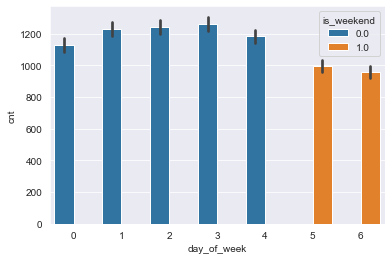

In [74]:
# with pointplot
sns.barplot(x="day_of_week", y="cnt", data=df, hue="is_weekend")

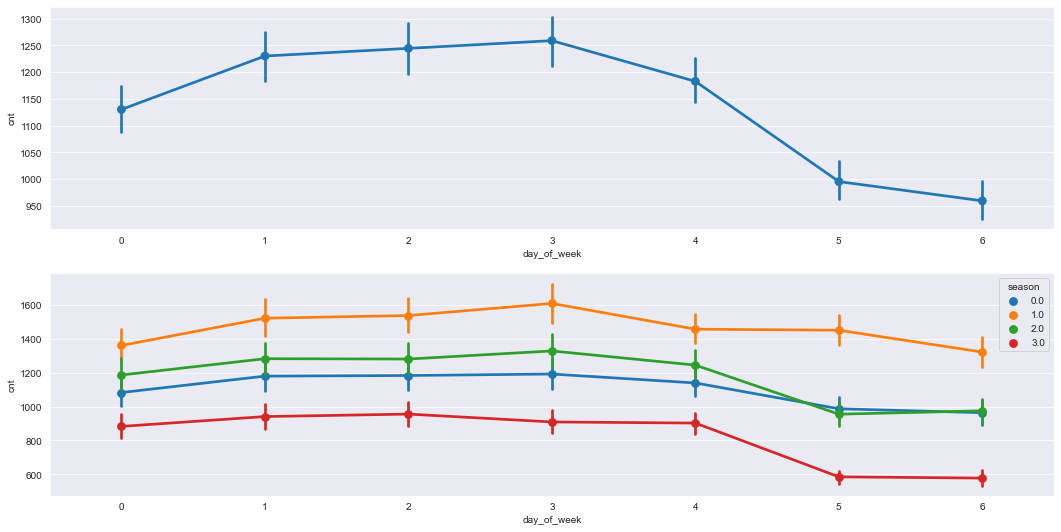

In [76]:
# with pointplot
fig , ax = plt.subplots(2,1, figsize=(18,9))
sns.pointplot(data=df, x="day_of_week", y="cnt", ax=ax[0])
sns.pointplot(data=df, x="day_of_week", y="cnt", ax=ax[1], hue="season");

day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1127,1144,1140,1211,1194,1222,1261,1157,...,1127,1173,1054,1190,1081,1130,1062,1079,1156,968


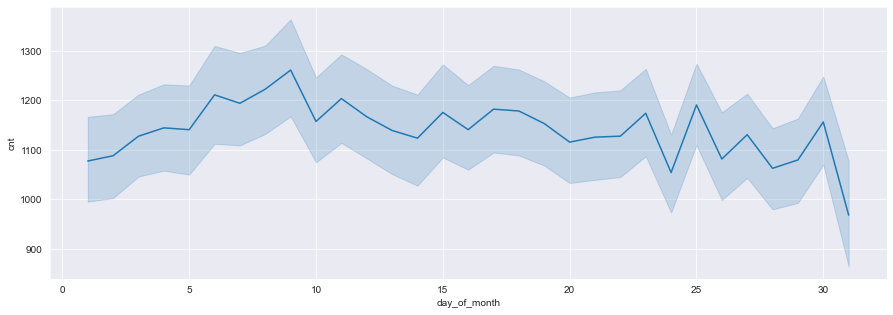

In [80]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x="day_of_month", y="cnt")
pd.DataFrame(df.groupby("day_of_month").cnt.mean().astype("int")).T

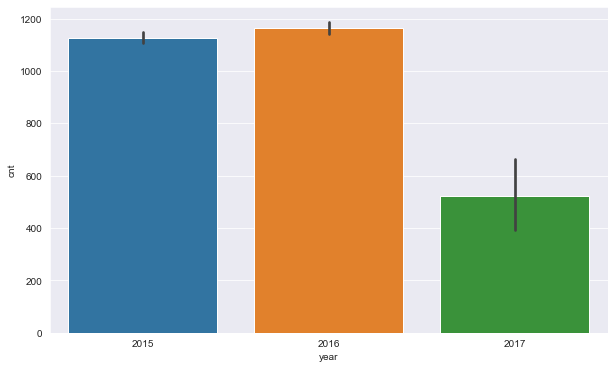

In [81]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="year", y="cnt");

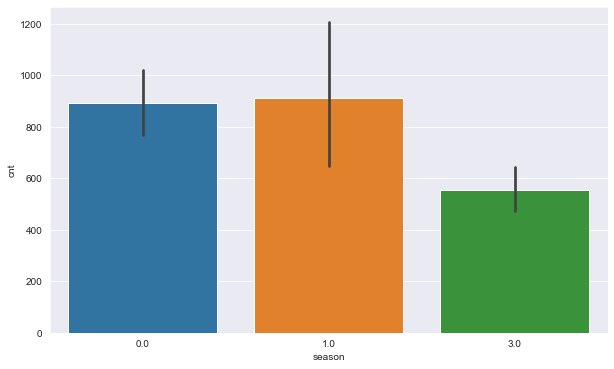

In [85]:
plt.figure(figsize=(10,6))
sns.barplot(data=df[df["is_holiday"]==1], x="season", y="cnt");

In [86]:
df.is_weekend.value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

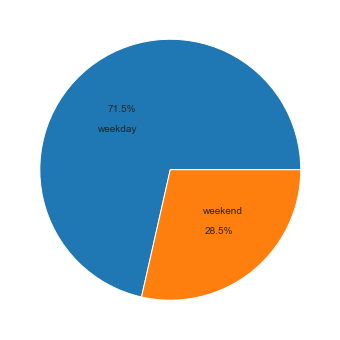

In [87]:
ig, ax = plt.subplots(figsize=(6,6))
ax.pie(df.is_weekend.value_counts(),
      labels=["weekday","weekend"],
       labeldistance=0.4,
        autopct="%.1f%%"
      );

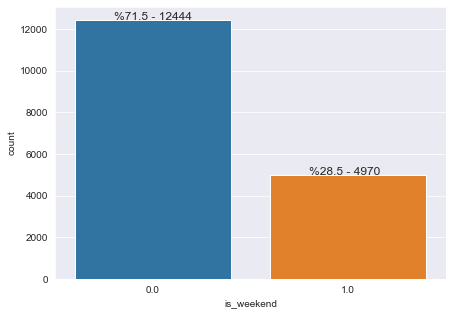

In [88]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.countplot(x='is_weekend',data=df)
for bar in ax.patches: 
        ax.annotate(  "%"+str(round(100*bar.get_height()/len(df),1)) +' - '+ str(bar.get_height() ), 
                    (bar.get_x()+0.2 , bar.get_height()+10) ,
                    size=12)

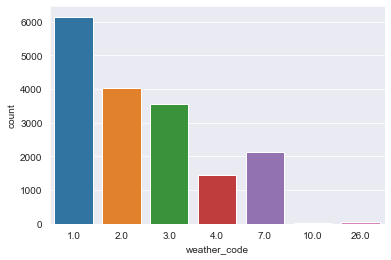

In [90]:
# with countplot
sns.countplot(x="weather_code", data=df);

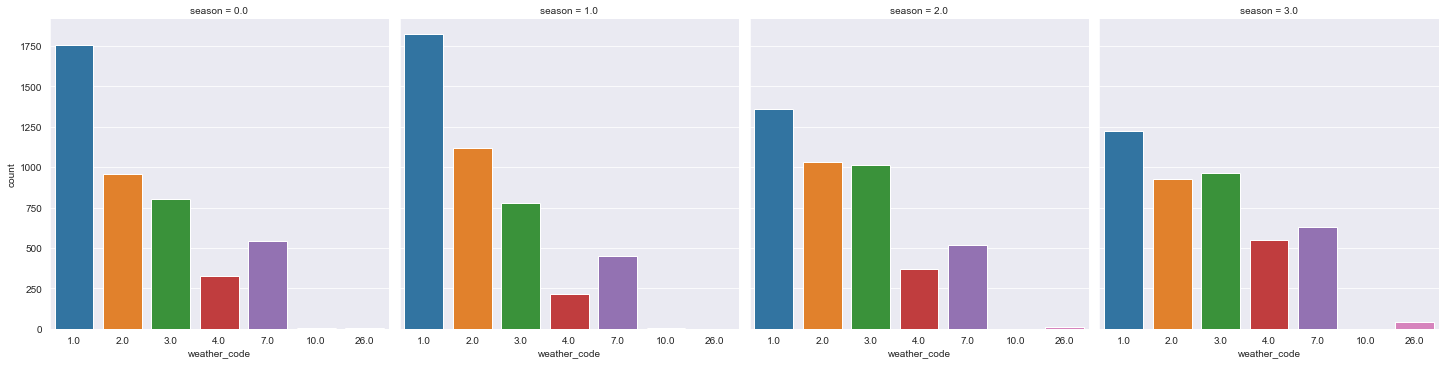

In [93]:
#with catplot
sns.catplot(x="weather_code", data=df, col="season", kind="count");

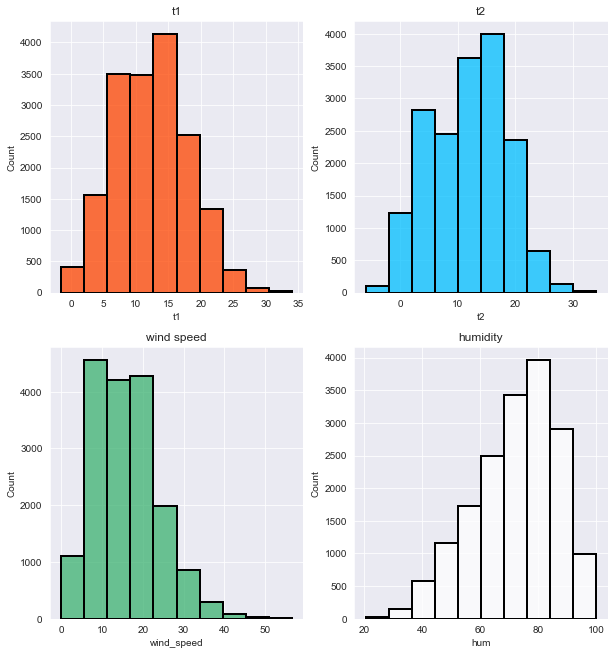

In [95]:
# matplotlip hist (ilk yöntem)
fig , ax = plt.subplots(2,2,figsize=(10,11))
sns.histplot(data=df, x="t1", bins=10, color="orangered", edgecolor = "black", lw = 2, ax=ax[0,0]).set_title("t1")
sns.histplot(data=df, x="t2", bins=10, color="deepskyblue", edgecolor = "black", lw = 2, ax=ax[0,1]).set_title("t2")
sns.histplot(data=df, x="wind_speed", bins=10, color="mediumseagreen", edgecolor = "black", lw = 2, ax=ax[1,0]).set_title("wind speed")
sns.histplot(data=df, x="hum", bins=10, color="white", edgecolor = "black", lw = 2, ax=ax[1,1]).set_title("humidity")
plt.show()

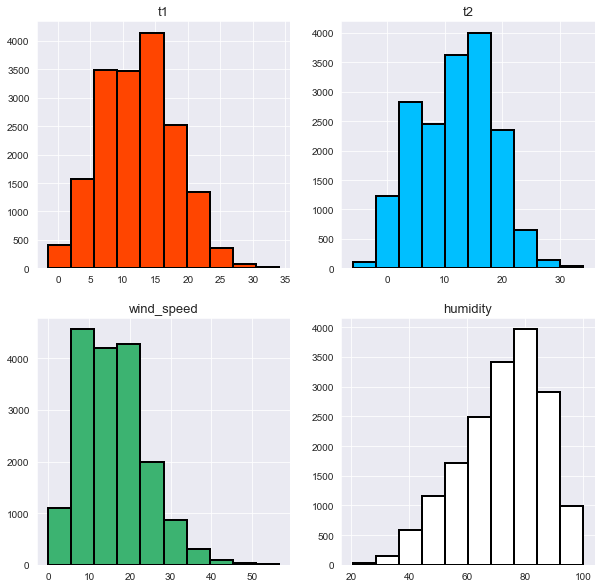

In [96]:
# matplotlip hist (second method)
fig,axes = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
axes[0][0].hist(df["t1"], bins = 10, color = "orangered", edgecolor = "black", linewidth = 2)
axes[0][1].hist(df["t2"], bins = 10, color = "deepskyblue", edgecolor = "black", linewidth = 2)
axes[1][0].hist(df["wind_speed"], bins = 10, color = "mediumseagreen", edgecolor = "black", linewidth = 2)
axes[1][1].hist(df["hum"], bins = 10, color = "White", edgecolor = "black", linewidth = 2)
axes[0][0].set_title("t1", fontsize = 13)
axes[0][1].set_title("t2", fontsize = 13)
axes[1][0].set_title("wind_speed", fontsize = 13)
axes[1][1].set_title("humidity", fontsize = 13)
plt.show()

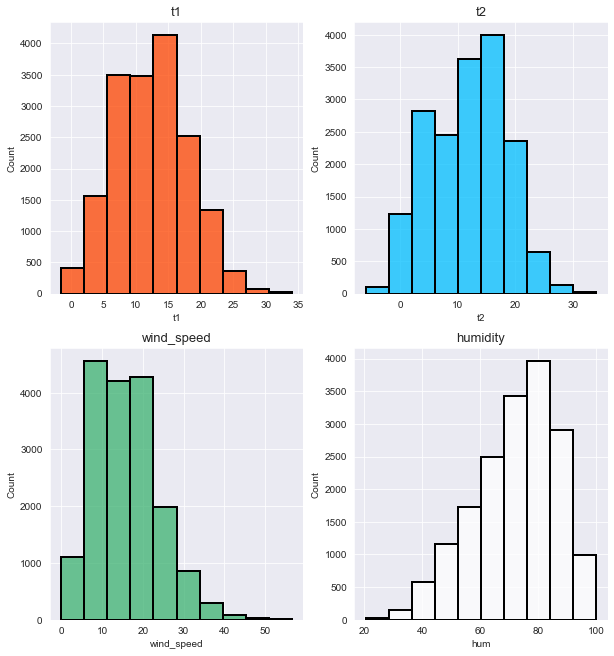

In [97]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (10,11))
sns.histplot(data=df, x ="t1", ax = ax[0][0], bins = 10, stat = "count", color = "orangered", edgecolor = "black", linewidth = 2).set_title("t1", fontsize = 13)
sns.histplot(data=df, x ="t2", ax = ax[0][1], bins = 10, stat = "count", color = "deepskyblue", edgecolor = "black", linewidth = 2).set_title("t2", fontsize = 13)
sns.histplot(data=df, x ="wind_speed", ax = ax[1][0], bins = 10, stat = "count", color = "mediumseagreen", edgecolor = "black", linewidth = 2).set_title("wind_speed", fontsize = 13)
sns.histplot(data=df, x ="hum", ax = ax[1][1], bins = 10, stat = "count",  color = "white", edgecolor = "black", linewidth = 2).set_title("humidity", fontsize = 13)
plt.show()

Text(0.5, 1.0, 'humidity')

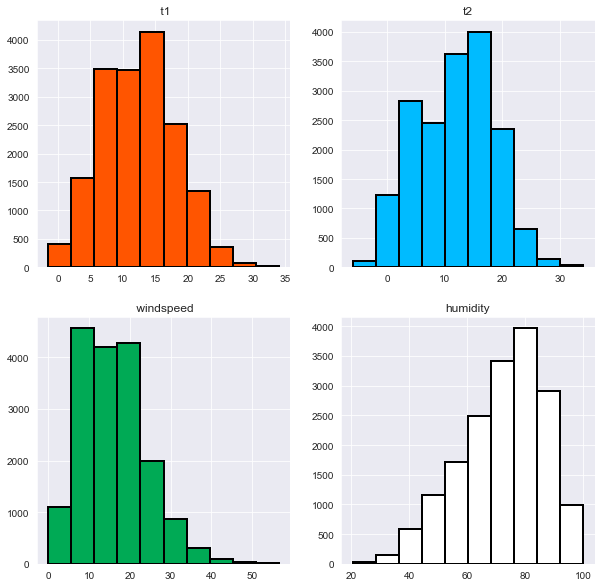

In [98]:
fig,axes=plt.subplots(2,2, figsize=(10,10))
axes[0,0].hist(x="t1",data=df,edgecolor="black",linewidth=2,color='#FF5500')
axes[0,0].set_title(" t1")
axes[0,1].hist(x="t2",data=df,edgecolor="black",linewidth=2,color='#00BBFF')
axes[0,1].set_title("t2")
axes[1,0].hist(x="wind_speed",data=df,edgecolor="black",linewidth=2,color='#00AA55')
axes[1,0].set_title(" windspeed")
axes[1,1].hist(x="hum",data=df,edgecolor="black",linewidth=2,color='#FFFFFF')
axes[1,1].set_title("humidity")

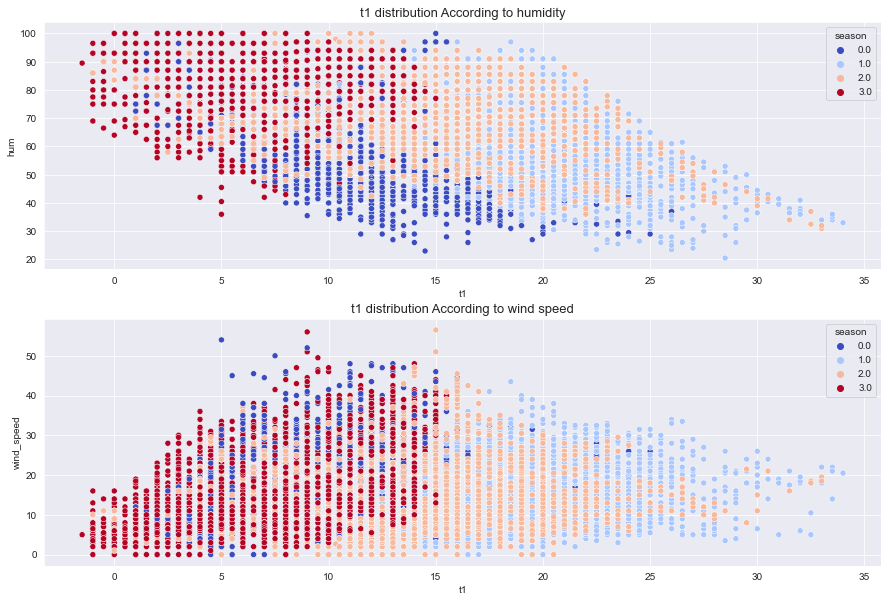

In [100]:
# seaborn scatterplot
fig, ax = plt.subplots(2,1,figsize=(15,10))
sns.scatterplot(data = df, x = "t1", y = "hum", palette = "coolwarm", hue = "season", ax = ax[0]).set_title("t1 distribution According to humidity", fontsize = 13)
sns.scatterplot(data = df, x = "t1", y = "wind_speed", palette = "coolwarm", hue = "season", ax = ax[1]).set_title("t1 distribution According to wind speed", fontsize = 13);


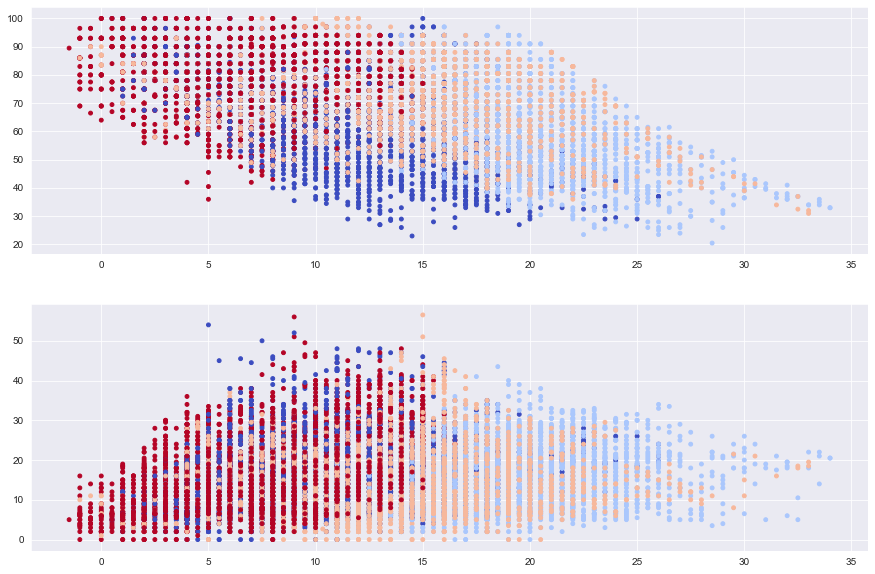

In [101]:
# matplotlib scatterplot
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.scatter(data=df, x="t1", y="hum", c="season", cmap="coolwarm", s = 15)
plt.subplot(2,1,2)
plt.scatter(data=df, x="t1", y="wind_speed", c="season", cmap="coolwarm", s = 15);

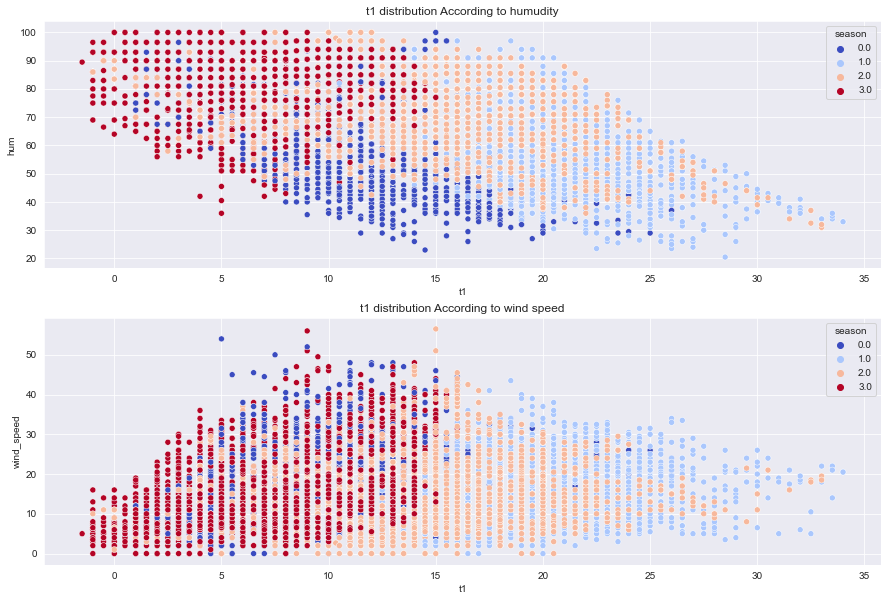

In [102]:
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.title("t1 distribution According to humudity")
sns.scatterplot(x="t1",y="hum",data=df, hue='season',palette="coolwarm")
plt.subplot(212)
plt.title("t1 distribution According to wind speed")
sns.scatterplot(x="t1",y="wind_speed",data=df, hue='season',palette="coolwarm");